# YouTube: Bayesian Analysis in Python

https://www.youtube.com/watch?v=-8VTcuCJF1s 

In [10]:
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

Priors

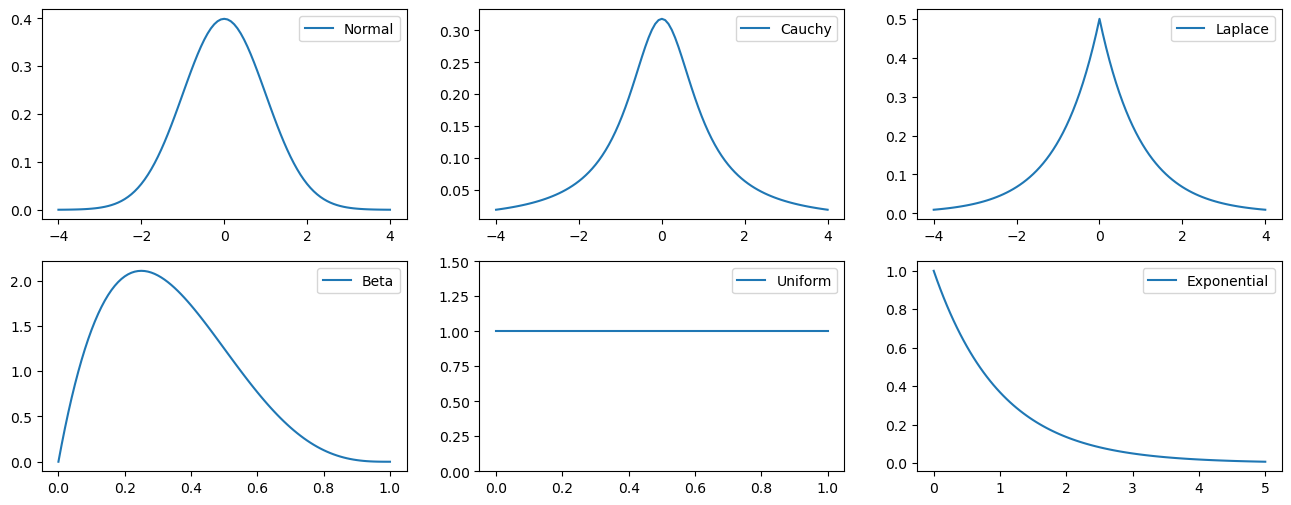

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (16, 6))
ax = np.ravel(ax)
x = np.linspace(-4, 4, 101)
ax[0].plot(x, stats.norm().pdf(x), label='Normal')
ax[1].plot(x, stats.cauchy().pdf(x), label = 'Cauchy')
ax[2].plot(x, stats.laplace().pdf(x), label = 'Laplace')
x = np.linspace(0, 1, 101)
ax[3].plot(x, stats.beta(2, 4).pdf(x), label = 'Beta')
ax[4].plot(x, stats.uniform().pdf(x), label = 'Uniform')
ax[4].set_ylim(0, 1.5)
x = np.linspace(0, 5, 101)
ax[5].plot(x, stats.expon().pdf(x), label = 'Exponential')
for n in range(6):
    ax[n].legend()
plt.show();


# Simple Model Implementation: Tossing a coin

A simple coin flipping model $y$ ~ $Bernoulli(\theta)$

In [12]:
def normalise(y, x):
    return y / np.trapz(y, x)


In [13]:
observed = np.array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [14]:
print('%d observations with mean %.3f.' %(observed.size, observed.mean()))

20 observations with mean 0.550.


### Bernoulli Model

Use 'grid approximation': Prior, likelihood and posterior are evaluated on a grid of points between 0 and 1

In [15]:
N = 201

# Values of theta on [0, 1]
theta = np.linspace(0, 1, N)
# Uniform prior - every of theta has equal probability
prior = normalise(np.repeat(1, N), theta)

A simple function to do Bayesian Update

In [16]:
# k = 0 - failure (tails)
# k = 1 - success (heads)
def bernoulli_model(k, theta, prior):
    posterior = theta**k * (1 - theta)**(1 - k) * prior
    return normalise(posterior, theta)

Now perform a series of updates and plot both prior (dashed) and posterior (solid)

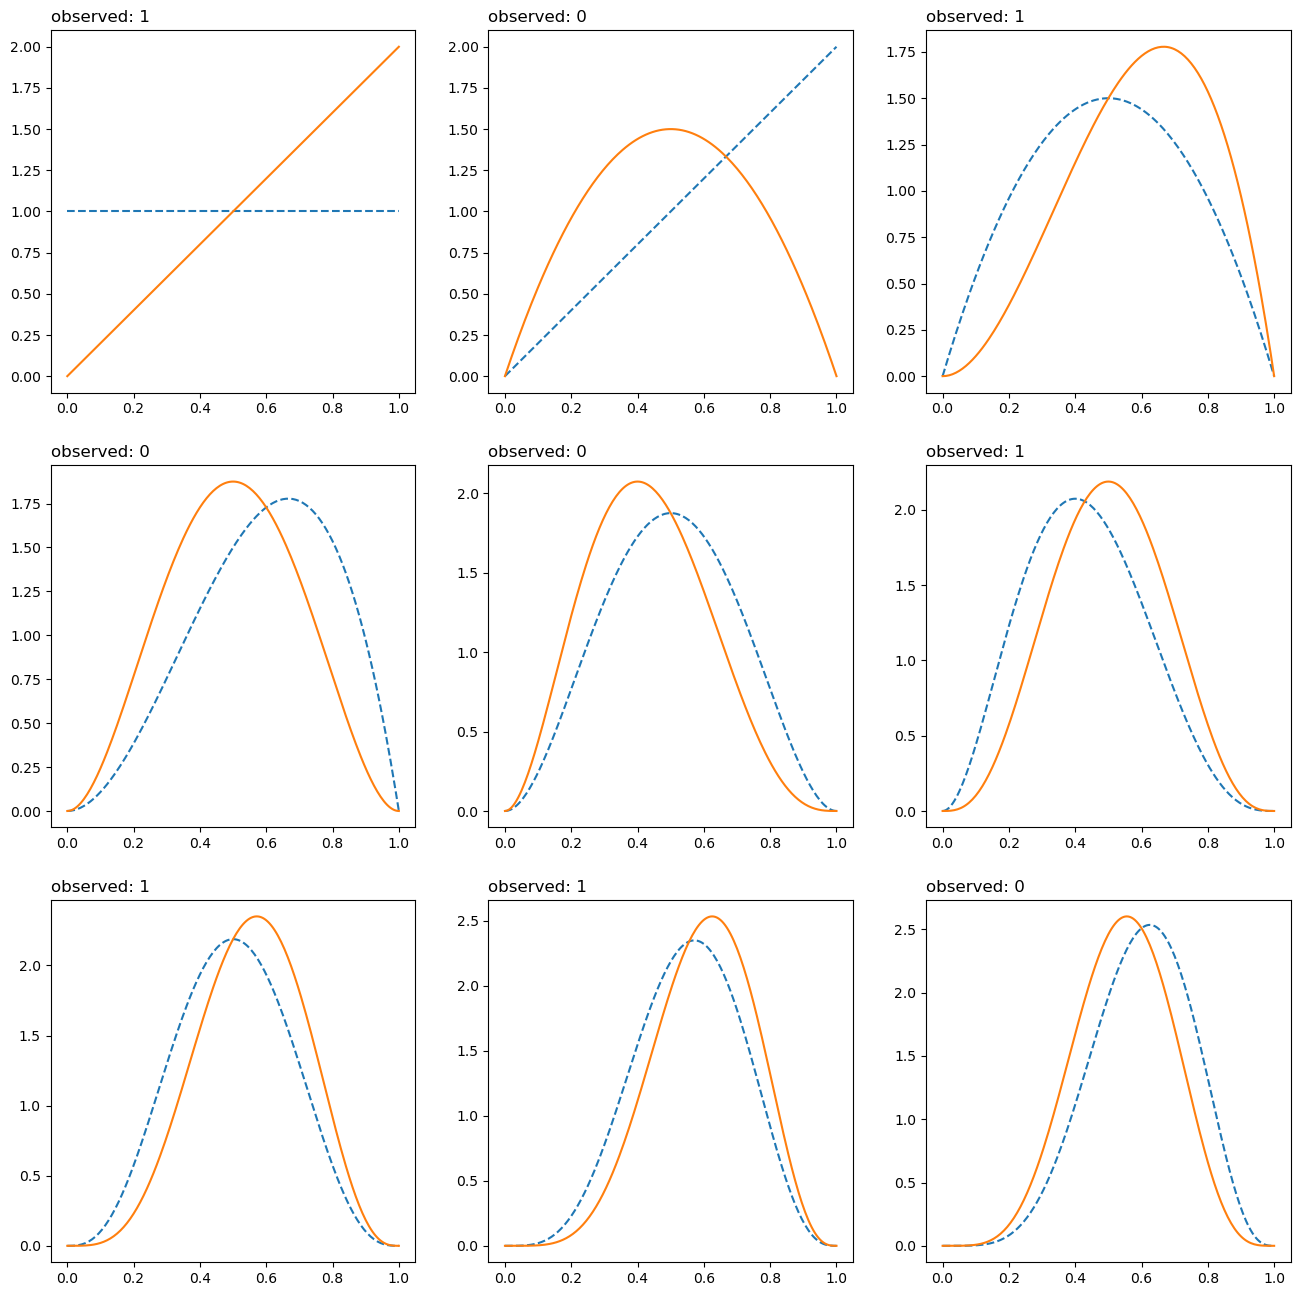

In [17]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(16, 16))
ax = np.ravel(ax)

for n in range(9):
    posterior = bernoulli_model(observed[n], theta, prior)

    ax[n].plot(theta, prior, linestyle='--');
    ax[n].plot(theta, posterior);
    ax[n].set_title('observed: %d' % observed[n], loc='left');

    prior = posterior

plt.show();

### Binomial Model

Group together the individual coin flips - single experiment with N trials
Very easy to swap models in this way

In [18]:
# k - number of successes
# n - number of trials
# alpha, beta - parameters of Beta distribution

def binomial_model(k, n, alpha, beta):
    theta = np.linspace(0, 1, 201)

    prior = stats.beta(alpha, beta)
    posterior = stats.beta(alpha + k, beta + n - k)
    # Normalise the likelihood (for plotting purposes only)
    likelihood = [stats.binom.pmf(k, n, t) for t in theta]
    likelihood = normalise(likelihood, theta)

    plt.figure(figsize=(16, 4))
    plt.plot(theta, prior.pdf(theta), label='Prior', linestyle='--')
    plt.plot(theta, posterior.pdf(theta), label='Posterior')
    plt.plot(theta, likelihood, label='Likelihood (normailised)')
    plt.xlim((0, 1))
    plt.legend();

    return (theta, posterior)

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
        0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
        0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
        0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
        0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
        0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
        0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
        0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
        0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
        0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
        0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
        0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
      

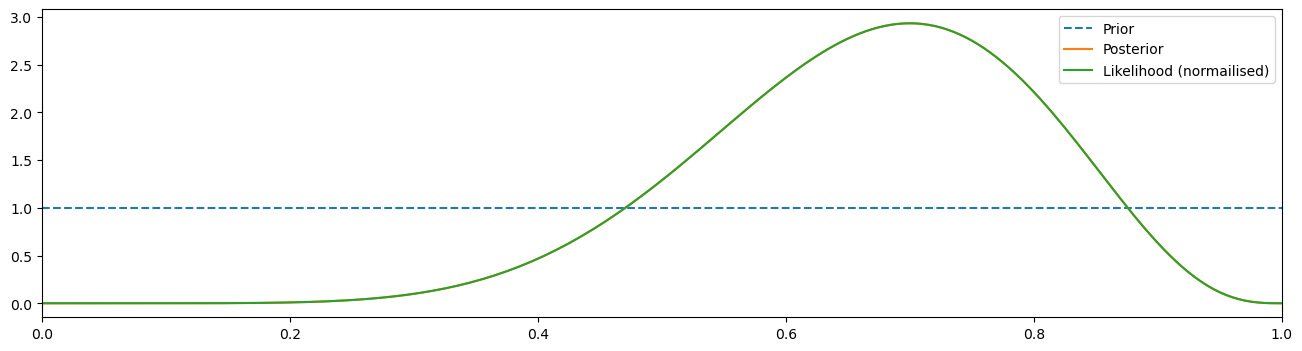

In [19]:
binomial_model(7, 10, 1, 1)

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
        0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
        0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
        0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
        0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
        0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
        0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
        0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
        0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
        0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
        0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
        0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
      

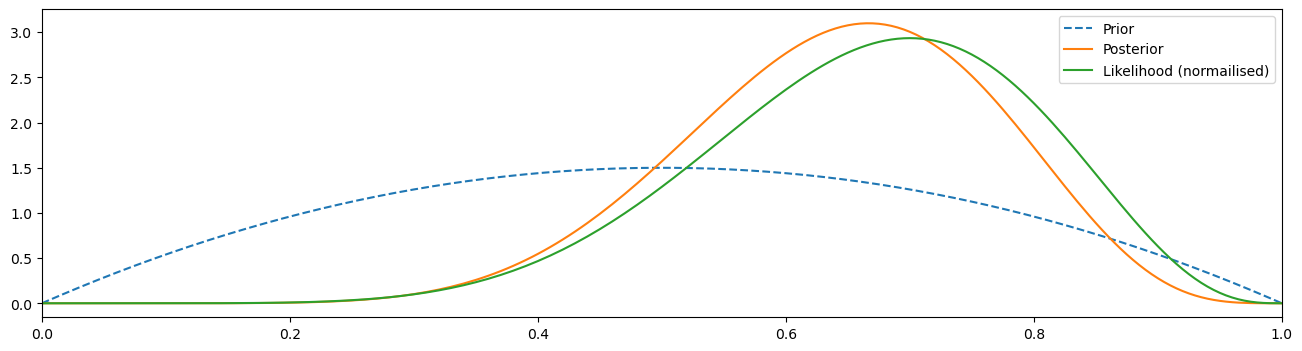

In [20]:
binomial_model(7, 10, 2, 2)   #10 trials, 7 successes

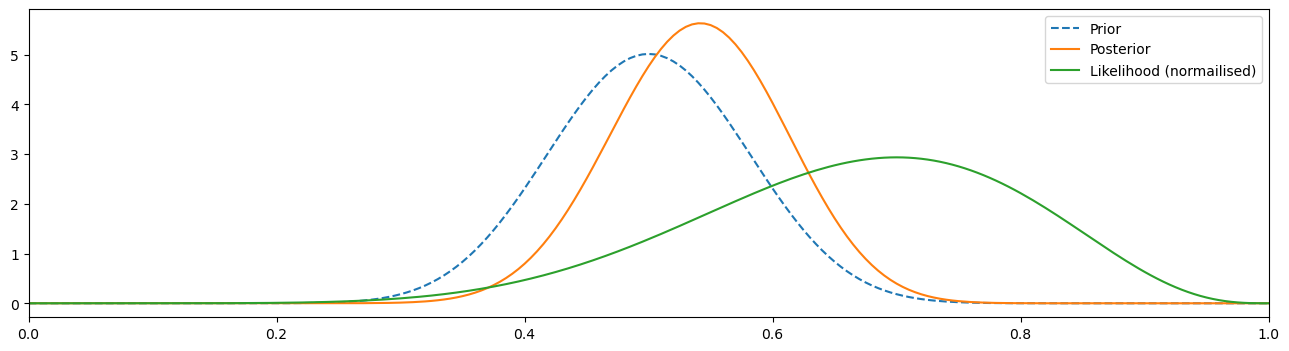

In [21]:
theta, posterior = binomial_model(7, 10, 20, 20)

The prior has moderated or regularised the results of the observations.

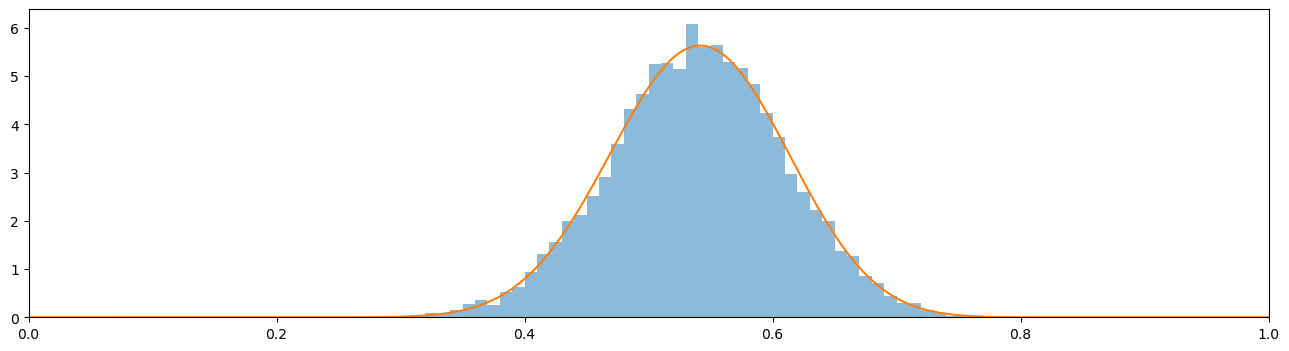

In [22]:
# Extract samples from the posterior distribution
posterior_samples = posterior.rvs(10000)

plt.figure(figsize=(16, 4))
plt.hist(posterior_samples, bins=np.linspace(0, 1, 101), alpha=0.5, density=True);
plt.plot(theta, posterior.pdf(theta))
plt.xlim((0, 1));


## Python Packages for Bayesian Analysis

Packages implemented in Python:
- emcee
- PyMC3
- Edward
- TenserFlow probability (TFP)
- PyMC4 (succesoor to PyMC3 based on TFP)

Packages which are wrappers around other systems:

- PyJAGS
- PyStan

### Markov Chain Monte Carlo

Dealing with multidimensional problems

Next step depends only on the current condition

The goal is to gain an intuitive understanding of Metropolis-Hastings Algorithm for Markov Chain Monte Carlo

In [38]:
import math

import numpy as np
np.random.seed(23)

import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf

from scipy import stats, optimize

In [39]:
observed = np.array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

#### Quick Frequentist Assessment

In [40]:
mu = observed.mean()
# Standard deviation of the mean
sigma = math.sqrt(mu * (1 - mu) /observed.size)

In [36]:
print('mean = %.3f | Standrad deviation = %.3f.' % (mu, sigma))

mean = 0.550 | Standrad deviation = 0.111.


95% CI for theta

In [37]:
(mu - 2 * sigma, mu + 2 * sigma)

(0.32751404538713014, 0.77248595461287)

### Maximizing the Likelihood

Probability of data given a particular value of a parameter.

We are looking at each individual .

Likelihood is the joint probability of all the data points  given the model and a specific value of theta

In [41]:
def likelihood(theta):
    return stats.bernoulli(theta).pmf(observed).prod()

def log_likelihood(theta):
    return np.log(stats.bernoulli(theta).pmf(observed)).sum()

/var/folders/7j/lt22v0hs7lb07jhzsq_g_w8w0000gn/T/ipykernel_24944/2654419196.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(stats.bernoulli(theta).pmf(observed)).sum()


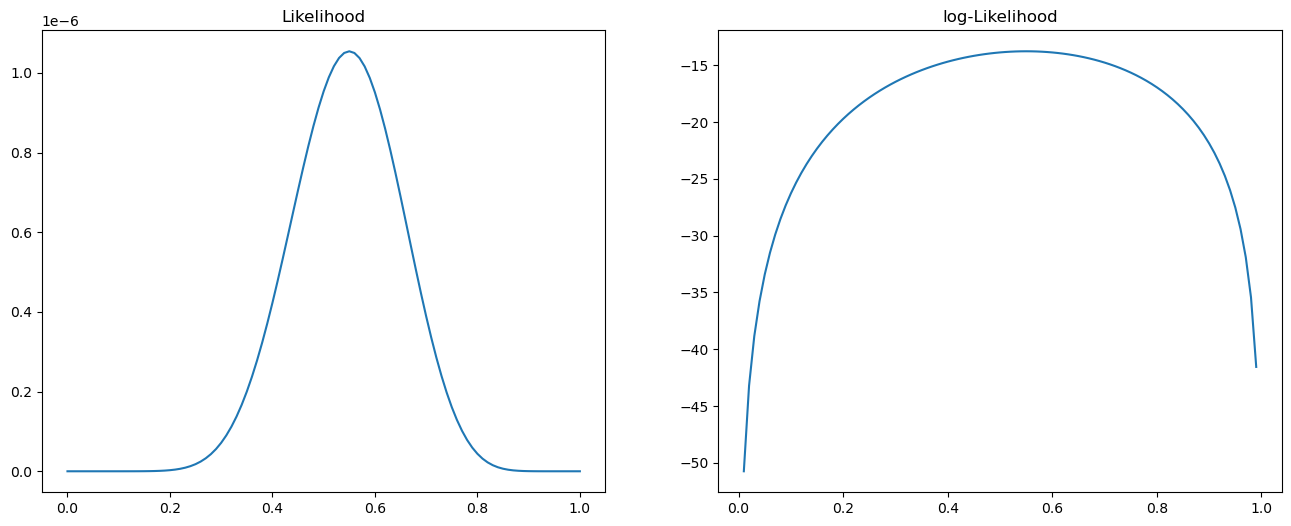

In [42]:
theta = np.linspace(0, 1, 101)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
ax1.plot(theta, [likelihood(x) for x in theta])
ax2.plot(theta, [log_likelihood(x) for x in theta])
ax1.set_title('Likelihood')
ax2.set_title('log-Likelihood')
plt.show()

We want to maximise the likelihood, however, most optimisers aim to minimize the objcetive function, so instead we will minimize the negative likelihood.

In [31]:
optimize.minimize_scalar(lambda theta: -likelihood(theta), bounds=(0, 1), method='bounded')

 message: Solution found.
 success: True
  status: 0
     fun: -1.0541495031882585e-06
       x: 0.5500000395041174
     nit: 10
    nfev: 10

In [32]:
optimize.minimize_scalar(lambda theta: -log_likelihood(theta), bounds=(0, 1), method='bounded')

 message: Solution found.
 success: True
  status: 0
     fun: 13.762776274277332
       x: 0.5500003709930871
     nit: 9
    nfev: 9

### MCMC Algorithm

1. Sample an initial value for $\theta_0$. Set $i = 0$.
2. Sample a *proposal* value, $\theta'$, in the vicinity of $\theta_i$ using $\theta' = \theta_i + \Delta\theta$ where $\Delta\theta $ is drawn from a suitable distribution.
3. Calculate the acceptance ratio, i.e. ratio of the posterior evaluated at $\theta'$ and $\theta_i$:
$$r = \frac{p(X|\theta')p(\theta')}{p(X|\theta_i)p(\theta_i)}$$
4. Accept or reject the proposal depending on
    - if $r\geq 1$ then set $\theta_{i+1}=\theta'$
    - if $r\lt 1$ then set $\theta_{i+1}=\theta'$ with probability $r$ otherwise set $\theta_{i+1}=\theta_i$
5. Assign $i -> i + 1$ and return to step 2.

Step 2 is the "Markov chain" component: the new value, $\theta'$, depends only on the present value, $\theta$. There are a variety of proposal distributions, but a simple approach is to sample $\Delta\theta$ from a narrow Normal distribution.

Step 3 is where we get around calculating the evidence because it divides out on the ratio of posterior probabilities.

### Choosing a Prior

Choose from one of the two following definitions of the prior.

In [43]:
# A cxompletely non-informative prior: theta is equally likely to be any value between 0 and 1
# prior = stats.uniform()

In [44]:
# A slightly more informative prior.
prior = stats.beta(20, 20)

Lets see what it looks like

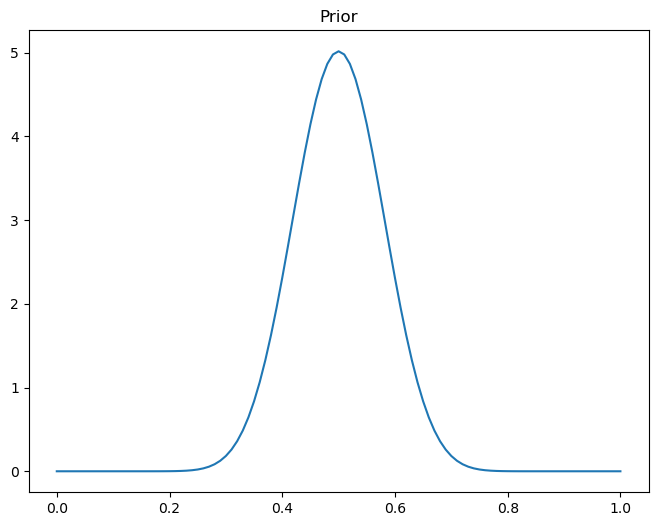

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(theta, [prior.pdf(x) for x in theta])
ax.set_title('Prior')
plt.show()

### Sampling the Posterior

A function that implements MCMC.

In [46]:
# data      = observations
# prior     = prior density
# samples   = posterior samples
def mcmc_step(data, prior, samples, verbose=False, step_size=0.1):
    current = samples[-1]
    # Sampled potential new value for thet (in the vicinity of the existing value!).
    proposal = stats.norm(current, step_size).rvs()

    # Likelihoods
    likelihood_current = stats.bernoulli(current).pmf(data).prod()
    likelihood_proposal = stats.bernoulli(proposal).pmf(data).prod()

    # Prior probabilities of most recent and potential new values for theta.
    prior_current = prior.pdf(current)
    prior_proposal = prior.pdf(proposal)

    # Probability of accepting proposal.
    r = (likelihood_proposal * prior_proposal) / (likelihood_proposal)
    r = min(r, 1)
    
    random = np.random.rand()
    accept = random < r

    if accept:
        samples.append(proposal)
    else:
        samples.append(current)

    if verbose:
        print('current: %.6f | L = %.3e prior = %.6f' % (current, likelihood_current, prior_current))
        print('proposal: %.6f | L = %.3e prior = %.6f' % (proposal, likelihood_proposal, prior_proposal))
        print('\nthreshold = %.6f + random = %.6f -> %s' % (r, random, 'accept' if accept else 'reject'))
        plot_sample(data, prior, current, proposal, accept, samples)

    return samples


The proposal, $\theta'$, is sampled in the vicinity of the previous sample, $\theta$. The width of the proposal distribution is important:

- If its too big then the rejection rate would be too high but
- if its too small then mixing would be inadequate (and sampling would be more like a random walk).

Either extreme would still get you to the correct result... but more slowly! Choosing a decent avlue for the proposal width will help the algorithm perform *efficiently*.

We're simply calculating the likelihood of the data. this works fine for a limited number of data points. However, if the data becomes large, then multiplying together the individual probabilities can result in floating point underflow. In this case, it makes more sense to calculkate the log-likelihood.

In [47]:
def plot_sample(data, prior, current, proposal, accept, samples):
    x = np.linspace(0, 1, 1000)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    color = 'g' if accept else 'r'
    k = data.sum()
    n = data.size

    prior_pdf = prior.pdf(x)
    likelihood = [stats.binom.pmf(k, n, theta) for theta in x]

    ax1.plot(x, prior_pdf)
    ax1.plot([current] * 2, [0, prior.pdf(current)], color='k', label='Current')
    ax1.plot([proposal] * 2, [0, prior.pdf(proposal)], color='k', label='Proposal')
    ax1.set_xticks(np.linspace(0, 1, 11), minor=True)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, which='minor')
    ax1.set(title='Prior')
    ax1.legend()

    #ax2.plot(x, likelihood)
    #ax2.plot([current] * 2, [0, stats.binom.pmf(k, n, current)], color='k')
    #ax2.plot([proposal] )

Initiate Markov Chain by taking a sample from the prior.

In [49]:
posterior = [prior.rvs()]
posterior

[0.5989496495122942]

This is the beginning of the sample chain. Variable 'Posterior' is a list to which we arre going to add successive samples.

current: 0.598950 | L = 9.552e-07 prior = 2.347421
proposal: 0.466735 | L = 7.985e-07 prior = 4.609472

threshold = 1.000000 + random = 0.002465 -> accept


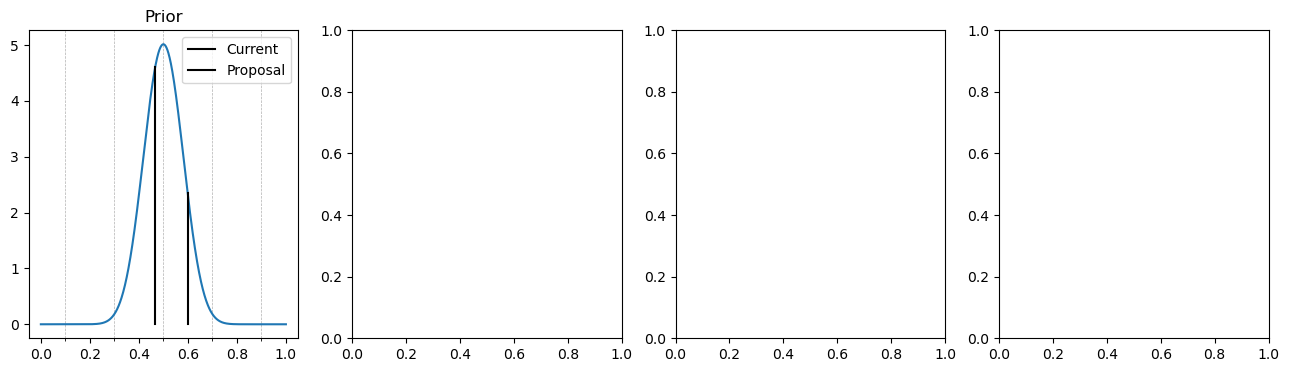

In [50]:
posterior = mcmc_step(observed, prior, posterior, True)

current: 0.466735 | L = 7.985e-07 prior = 4.609472
proposal: 0.643961 | L = 7.260e-07 prior = 0.968689

threshold = 0.968689 + random = 0.884032 -> accept


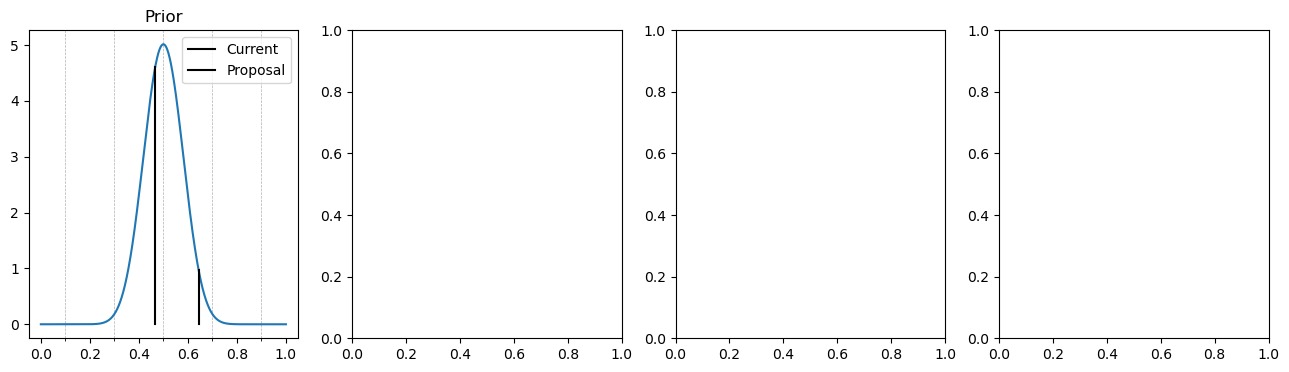

In [51]:
posterior = mcmc_step(observed, prior, posterior, True)

In [ ]:
# Code for plots incomplete